In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Import the dataset

In [20]:
# Load your dataset
file_path = "data_orginal.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')
df.head()

,Brand,Manufacturer,Therapeutic Area,Region,Sales Units,Unit Price
0,Abarcafil,Cascade Therapeutics,ARV,East,30245,260
1,Abarcafil,Cascade Therapeutics,ARV,Mid-West,23333,260
2,Abarcafil,Cascade Therapeutics,ARV,South,18432,260
3,Abarcafil,Cascade Therapeutics,ARV,West,34134,260
4,Alistuzumab,Matterhorn Pharma,Oncology,East,6831,950


In [ ]:
# Step 1: Calculate Revenue
df['Total Sales'] = df['Sales Units'] * df['Unit Price']

In [ ]:
# Step 2: Group by Brand and summarize
brand_summary = df.groupby('Brand').agg({
    'Sales Units': 'sum',
    'Total Sales': 'sum'
})
brand_summary


,Sales Units,Total Sales
Brand,,
Abarcafil,106144,27597440
Alistuzumab,20976,19927200
Astoridone,10600,1855000
Bertigrevir,89709,8522355
Empigrevir,117037,46814800
Fortinib,16684,21272100
Janogrevir,111517,39030950
Krastuzumab,15455,10818500
Orestidone,12702,1270200


In [63]:
# Rename columns for clarity
brand_summary = brand_summary.rename(columns={'Sales Units': 'Units Sold'})
brand_summary = brand_summary.rename(columns={'Total Sales': 'Revenue'})


# Add Unit Price column to brand_summary
# brand_summary['Unit Price'] = brand_summary['Revenue'] / brand_summary['Units Sold']
brand_summary['Unit Price'] = df.groupby('Brand')['Unit Price'].mean()
brand_summary


,Units Sold,Revenue,Unit Price
Brand,,,
Abarcafil,106144,27597440,260.0
Alistuzumab,20976,19927200,950.0
Astoridone,10600,1855000,175.0
Bertigrevir,89709,8522355,95.0
Empigrevir,117037,46814800,400.0
Fortinib,16684,21272100,1275.0
Janogrevir,111517,39030950,350.0
Krastuzumab,15455,10818500,700.0
Orestidone,12702,1270200,100.0


In [66]:
# Step 3: Calculate Market Share
brand_summary['Market Share (%)'] = (brand_summary['Revenue'] / brand_summary['Revenue'].sum()) * 100
brand_summary = brand_summary.round({'Market Share (%)': 2})

brand_summary = brand_summary[['Market Share (%)', 'Units Sold', 'Revenue', 'Unit Price']]
brand_summary = brand_summary.sort_values(by='Market Share (%)', ascending=False)
brand_summary

,Market Share (%),Units Sold,Revenue,Unit Price
Brand,,,,
Empigrevir,20.10,117037,46814800,400.0
Janogrevir,16.76,111517,39030950,350.0
Abarcafil,11.85,106144,27597440,260.0
Fortinib,9.13,16684,21272100,1275.0
Alistuzumab,8.56,20976,19927200,950.0
Ventrofil,8.56,132936,19940400,150.0
Treatinib,8.33,11584,19403200,1675.0
Pluvitinib,5.99,17448,13958400,800.0
Krastuzumab,4.65,15455,10818500,700.0


In [45]:
units_sold_grand_total = brand_summary['Units Sold'].sum()
units_sold_grand_total

683457

In [46]:
revenue_grand_total = brand_summary['Revenue'].sum()
revenue_grand_total

232879925

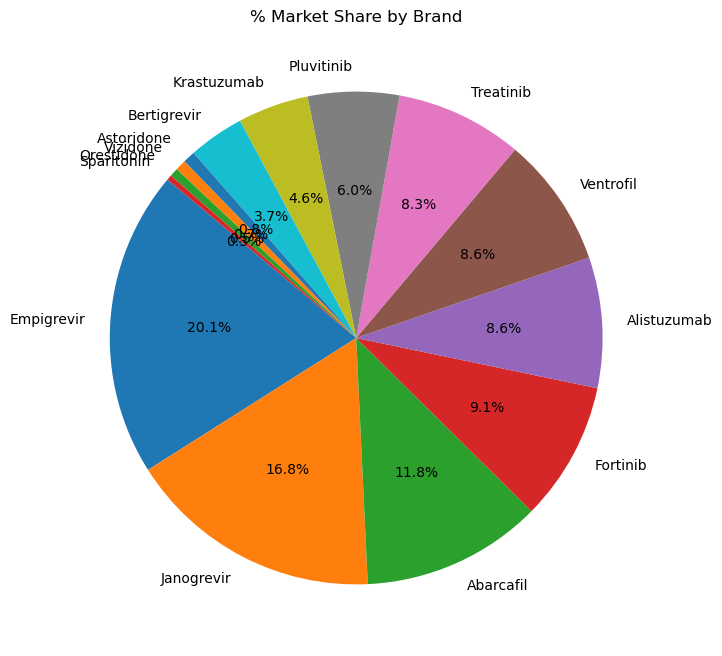

In [53]:
# 8. Create Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(brand_summary["Market Share (%)"], labels=brand_summary.index, autopct='%1.1f%%', startangle=140)
plt.title("% Market Share by Brand")
# plt.axis('equal')
plt.show()


### 1. Is Empigrevir a high-priced drug, or does it just sell a lot?


In [54]:
empigrevir = df[df['Brand'] == 'Empigrevir']
emp_units = empigrevir['Sales Units'].sum()
emp_revenue = empigrevir['Revenue'].sum()
emp_price = emp_revenue / emp_units

print(f"Empigrevir sold {emp_units:,} units and made ${emp_revenue:,} — that's ${emp_price:.2f} per unit.")

Empigrevir sold 117,037 units and made $46,814,800 — that's $400.00 per unit.


- Insight: Empigrevir drives the most revenue because it’s widely used (always in top 3 Units Sold in each Region), not because it’s expensive.
- Strategy: Find out what’s helping it reach so many patients like coverage, prescriber habits, or distribution, and use the same approach for similar ARV products.

### 2. What explains Fortinib’s high revenue with few units?

In [55]:
fortinib = df[df['Brand'] == 'Fortinib']
fort_units = fortinib['Sales Units'].sum()
fort_revenue = fortinib['Revenue'].sum()
fort_price = fort_revenue / fort_units

print(f"Fortinib sold {fort_units:,} units and made ${fort_revenue:,} — that's ${fort_price:.2f} per unit.")

Fortinib sold 16,684 units and made $21,272,100 — that's $1275.00 per unit.


- Insight: Fortinib makes a lot of money from a small number of sales, it’s priced high likely due to its cancer use.
- Strategy: Focus on keeping that premium justified, build clinical trust, highlight outcomes, and work with payers where needed.

### 3. Which brands are high volume but low revenue (possible underpriced)?

In [56]:
brand_summary = df.groupby('Brand').agg({
    'Sales Units': 'sum',
    'Revenue': 'sum'
}).rename(columns={'Sales Units': 'Units Sold'})

brand_summary['Avg Price'] = brand_summary['Revenue'] / brand_summary['Units Sold']
high_volume_low_price = brand_summary.sort_values(by='Units Sold', ascending=False).head(5)

print("\nTop 5 high-volume brands (check their pricing):")
print(high_volume_low_price)


Top 5 high-volume brands (check their pricing):
             Units Sold   Revenue  Avg Price
Brand                                       
Ventrofil        132936  19940400      150.0
Empigrevir       117037  46814800      400.0
Janogrevir       111517  39030950      350.0
Abarcafil        106144  27597440      260.0
Bertigrevir       89709   8522355       95.0


Ventrofil sold 132,936 units but made $19.9M ($150 per unit).
- Insight: Ventrofil sells the most units but earns less per unit — it might be underpriced or heavily discounted.
- Strategy: Review its pricing and see if there’s room to adjust without losing market share.


### 4. Are top market share brands from the same Therapeutic Area?


In [57]:
df_total_rev = df.groupby('Brand')['Revenue'].sum().reset_index()

# Merge with therapeutic area
top_brands = df_total_rev.sort_values(by='Revenue', ascending=False).head(3)
top_with_area = pd.merge(top_brands, df[['Brand', 'Therapeutic Area']].drop_duplicates(), on='Brand')

print("\nTop 3 brands by revenue and their therapeutic area:")
print(top_with_area)


Top 3 brands by revenue and their therapeutic area:
        Brand   Revenue Therapeutic Area
0  Empigrevir  46814800              ARV
1  Janogrevir  39030950              ARV
2   Abarcafil  27597440              ARV


- Insight: The ARV market is the dominant driver of revenue, both in high volume and consistent adoption.
- Strategy: If we’re already in ARVs, we should keep investing. If not, we may want to consider entering or partnering in this space.


### 5. What about low performers?

In [60]:
low_performers = brand_summary.sort_values(by=['Units Sold', 'Revenue']).head(3)

print("\nBottom 3 brands by both units sold and revenue:")
print(low_performers)


Bottom 3 brands by both units sold and revenue:
            Units Sold  Revenue  Avg Price  Market Share (%)
Brand                                                       
Sparitonin        9698   824330       85.0          0.353972
Astoridone       10600  1855000      175.0          0.796548
Vizidone         10967  1645050      150.0          0.706394


- Insight: These drugs are struggling on both fronts, low reach and low pricing.
- Strategy: Reassess their position. Do they need marketing help, better access, or is it time to pull back?
